In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image

import splitfolders
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [2]:
splitfolders.ratio('C:/Users/saran/Downloads/nature/seg_train/seg_train/', output="output", seed=1337, ratio=(0.8, 0.2))

Copying files: 14034 files [00:14, 959.82 files/s] 


In [3]:
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(rescale = 1.0 / 255)

In [4]:
train_generator = datagen.flow_from_directory(
    "C:/Users/saran/output/train",
    batch_size = 32,
    target_size = (150,150),
    class_mode = "categorical"
)
validation_generator = test_gen.flow_from_directory(
    "C:/Users/saran/output/val",
    batch_size = 32,
    target_size = (150,150),
    class_mode = "categorical"
)

test_generator = test_gen.flow_from_directory(
        "C:/Users/saran/Downloads/nature/seg_test/seg_test",
        target_size=(150, 150),
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

Found 11224 images belonging to 6 classes.
Found 2810 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [8]:
input_size = 150
model = tf.keras.Sequential([
layers.Conv2D(input_shape=(input_size,input_size,3),filters = 32,kernel_size=(3,3),padding = 'same',activation='relu'),
layers.MaxPool2D(),

layers.Conv2D(filters= 64,kernel_size=(3,3),activation='relu',padding='same'),
layers.MaxPool2D(),

layers.Conv2D(filters = 64,kernel_size=(3,3),activation='relu',padding='same'),
layers.MaxPool2D(),

layers.Conv2D(filters = 128,kernel_size=(3,3),activation='relu',padding = 'same'),
layers.MaxPool2D(),

layers.Conv2D(filters = 256,kernel_size=(3,3),activation='relu',padding = 'same'),
layers.MaxPool2D(),

layers.Flatten(name='flatten'),
#layers.Dense(150, activation = 'relu'),
#layers.Dense(100, activation = 'relu'),
layers.Dense(6, activation = 'softmax')

])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [11]:
history = model.fit(train_generator, steps_per_epoch = 11224 // 32,
                    validation_steps = 2810 // 32,
                    epochs = 15,
                    validation_data = validation_generator)

Epoch 1/15
350/350 [==============================] - 354s 1s/step - loss: 1.1924 - accuracy: 0.5178 - val_loss: 0.9484 - val_accuracy: 0.6347
Epoch 2/15
350/350 [==============================] - 594s 2s/step - loss: 0.8919 - accuracy: 0.6547 - val_loss: 0.7523 - val_accuracy: 0.7302
Epoch 3/15
350/350 [==============================] - 194s 554ms/step - loss: 0.7463 - accuracy: 0.7266 - val_loss: 0.6334 - val_accuracy: 0.7719
Epoch 4/15
350/350 [==============================] - 184s 526ms/step - loss: 0.6745 - accuracy: 0.7537 - val_loss: 0.6292 - val_accuracy: 0.7662
Epoch 5/15
350/350 [==============================] - 177s 504ms/step - loss: 0.6402 - accuracy: 0.7692 - val_loss: 0.7606 - val_accuracy: 0.7417
Epoch 6/15
350/350 [==============================] - 198s 564ms/step - loss: 0.5960 - accuracy: 0.7843 - val_loss: 0.5978 - val_accuracy: 0.7881
Epoch 7/15
350/350 [==============================] - 189s 539ms/step - loss: 0.5636 - accuracy: 0.7928 - val_loss: 0.5385 - val_a

In [13]:
from collections import Counter
y_pred = model.predict(test_generator)
y_pred = [i.argmax() for i in y_pred]
sorted(Counter(y_pred).items())

3000/3000 [==============================] - 23s 8ms/step


[(0, 502), (1, 486), (2, 554), (3, 402), (4, 592), (5, 464)]

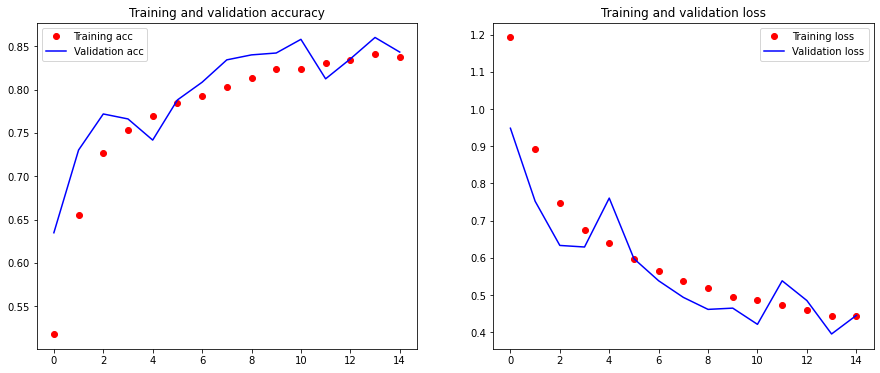

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 6) )
ax[0].plot(epochs, acc, 'ro', label='Training acc')
ax[0].plot(epochs, val_acc, 'b', label='Validation acc')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()

ax[1].plot(epochs, loss, 'ro', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()
plt.show()

In [15]:
y_test = test_generator.classes
sorted(Counter(y_test).items())

[(0, 437), (1, 474), (2, 553), (3, 525), (4, 510), (5, 501)]

In [17]:
from sklearn.metrics import classification_reportcation_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       437
           1       0.96      0.98      0.97       474
           2       0.81      0.81      0.81       553
           3       0.88      0.67      0.76       525
           4       0.78      0.91      0.84       510
           5       0.92      0.85      0.88       501

    accuracy                           0.85      3000
   macro avg       0.86      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



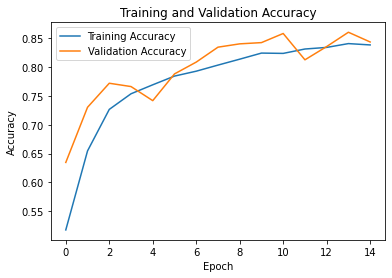

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [19]:
evaluation_results = model.evaluate(test_generator)
print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

3000/3000 [==============================] - 23s 8ms/step - loss: 0.4394 - accuracy: 0.8500
Test Loss: 0.43943119049072266
Test Accuracy: 0.8500000238418579


In [20]:
model.save('bestmodel.h5')
print('model saved')

model saved


C:\Users\saran\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
model.save('C:/Users/saran/Downloads/nature/bestmodel.h5')
print('model saved')

model saved


In [23]:
from keras.models import load_model
savedModel=load_model('bestmodel.h5')
savedModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

1/1 [==============================] - 0s 21ms/step


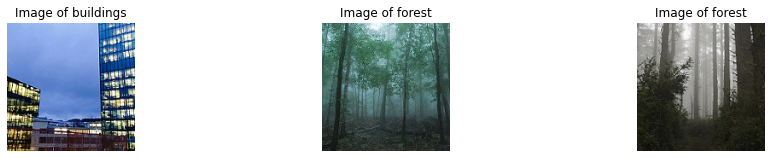

In [26]:
plt.figure(figsize=(16, 8))
imags=["C:/Users/saran/Downloads/nature/seg_test/seg_test/buildings/20064.jpg",
      "C:/Users/saran/Downloads/nature/seg_test/seg_test/forest/20100.jpg",
      "C:/Users/saran/Downloads/nature/seg_test/seg_test/forest/20166.jpg"]
labels = {0:"buildings",1:"forest",2:"glacier",3:"mountain",4:"sea",5:"street"}
for i in range(3):
    img = image.load_img(imags[i], target_size=(150, 150))
    plt.subplot(3,3, i + 1)
    plt.imshow(img)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    predictions = savedModel.predict(img_array)
    plt.title(f"Image of {labels[np.argmax(predictions)]}")  
    plt.axis("off")